# **TASK 1**

<ipython-input-17-5beeffee89f5>:38: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10 * np.log10(E_b / var1), I1, label = 'Variance = ' + str(var1))
<ipython-input-17-5beeffee89f5>:39: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10 * np.log10(E_b / var2), I2, label = 'Variance = ' + str(var2))
<ipython-input-17-5beeffee89f5>:40: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10 * np.log10(E_b / var3), I3, label = 'Variance = ' + str(var3))


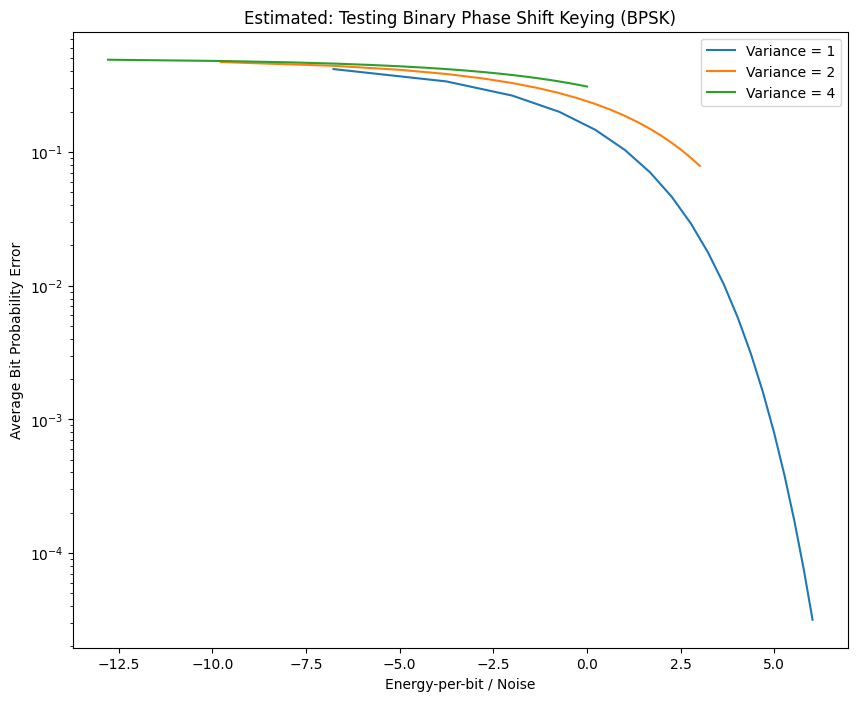

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

def integrand(x, mean, variance):
  # Calculates the Gaussian PDF with the given mean and variance
  gaussian_pdf = (np.sqrt(2 * np.pi * variance) ** (-1)) * (np.exp(-(x - mean) ** 2 / (2 * variance)))
  return gaussian_pdf

def plot1(mean, d):
  # Generates a sequence of values of power from 0 to 4 and divides them by the provided parameter d to get energy-per-bit
  P = np.linspace(0, 4, 20)
  E_b = P / d
  var1 = 1
  var2 = 2
  var3 = 4

  I1 = []
  # Iterates through each energy-per-bit value, calculates I1 for the given variance, and appends it to I1
  for e_b in E_b:
      i, _ = quad(integrand, d * e_b / var1, np.Inf, args=(mean, var1))
      I1.append(i)

  I2 = []
  # Iterates through each energy-per-bit value, calculates I2 for the given variance, and appends it to I2
  for e_b in E_b:
      i, _ = quad(integrand, d * e_b / var2, np.Inf, args=(mean, var2))
      I2.append(i)

  I3 = []
  # Iterates through each energy-per-bit value, calculates I3 for the given variance, and appends it to I3
  for e_b in E_b:
      i, _ = quad(integrand, d * e_b / var3, np.Inf, args=(mean, var3))
      I3.append(i)

  # Generates a plot of the calculated values for I1, I2, and I3
  plt.figure(figsize=(10, 8))
  plt.plot(10 * np.log10(E_b / var1), I1, label = 'Variance = ' + str(var1))
  plt.plot(10 * np.log10(E_b / var2), I2, label = 'Variance = ' + str(var2))
  plt.plot(10 * np.log10(E_b / var3), I3, label = 'Variance = ' + str(var3))
  plt.legend()
  plt.xlabel('Energy-per-bit / Noise')
  plt.yscale("log")
  plt.ylabel('Average Bit Probability Error')
  plt.title('Estimated: Testing Binary Phase Shift Keying (BPSK)')
  plt.show()

# Plot the calculated values of I1, I2, and I3 using the given mean and variance parameters
plot1(0,1)



In [ ]:
# Importing necessary packages
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Defining the master function
def master_function(n,d):

  # Defining a Monte Carlo simulation function for BER
  def MC_BER_simulation(n, d, p_, sims = 500, variance = 1, mean = 0):

    # Defining a binary phase shift keying (BPSK) function
    def BPS(n, d, p_, dimension = 1):

      # Defining an information source function
      def IS():
        m_transmitted = np.random.choice([0,1], (dimension, d))
        return m_transmitted, np.where(m_transmitted == 1, np.sqrt(p_/n), -np.sqrt(p_/n))

      # Transmitted signal and channel coefficients
      m_transmitted, x = IS()
      H = np.ones((dimension, dimension))

      # Generating additive Gaussian noise
      gaussian_pdf = np.random.normal(mean, variance, (dimension, n))
      y = H @ x + gaussian_pdf

      # Decision making at the receiver
      m_received = np.where(y >= 0, 1, 0)
      return np.abs(np.sum(m_received - m_transmitted))

    # Run the BPSK simulation and count the number of errors
    errors = 0
    for i in range(sims):
      errors += BPS(n, d, p_)

    # Find bit error probability
    BER = errors / sims
    return BER

  # Define a function for generating energy-per-bit over noise ratio (ENR)
  def ENR_generator(d, P, variance = 1):
    return 10 * np.log10(P/d/variance)

  # Generate a range of P values
  P = np.linspace(0,5,50)

  # Initialize BER and ENR values for different variance values
  BER1 = []
  ENR1 = []
  BER2 = []
  ENR2 = []
  BER3 = []
  ENR3 = []

  for p in tqdm(P):
    BER1.append(np.array(MC_BER_simulation(n, d, p)))
    ENR1.append(np.array(ENR_generator(d, p)))
    BER2.append(np.array(MC_BER_simulation(n, d, p, variance = 2)))
    ENR2.append(np.array(ENR_generator(d, p, variance = 2)))
    BER3.append(np.array(MC_BER_simulation(n, d, p, variance = 4)))
    ENR3.append(np.array(ENR_generator(d, p, variance = 4)))

  # Plots the BER vs. ENR graph for different variance values
  plt.figure(figsize=(10, 8))
  plt.scatter(ENR1,BER1, label = "Variance = 1")
  plt.scatter(ENR2,BER2, label = "Variance = 2")
  plt.scatter(ENR3,BER3, label = "Variance = 4")
  plt.legend()
  plt.xlabel('Energy-per-bit / Noise (dB)')
  plt.yscale("log")
  plt.ylabel('Average Bit Probability Error')
  plt.title('Average Probability Error vs. Energy-per-bit Over Noise')
  plt.show()


  0%|          | 0/50 [00:00<?, ?it/s]<ipython-input-18-aff69b4fc80b>:43: RuntimeWarning: divide by zero encountered in log10
  return 10 * np.log10(P/d/variance)
100%|██████████| 50/50 [00:07<00:00,  6.87it/s]


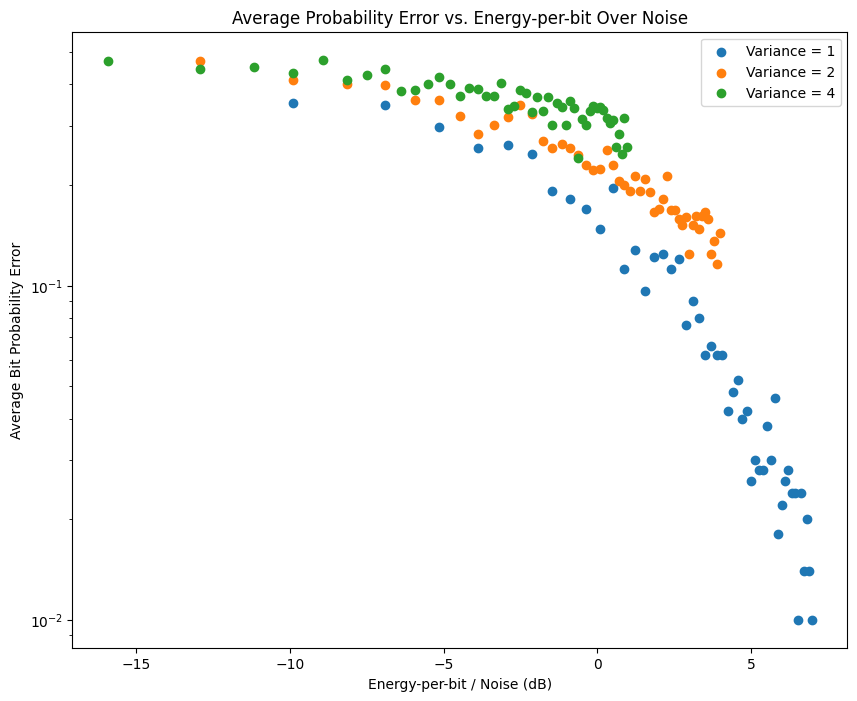

In [ ]:
master_function(1,1)

# **TASK 2**

  0%|          | 0/50 [00:00<?, ?it/s]<ipython-input-18-aff69b4fc80b>:43: RuntimeWarning: divide by zero encountered in log10
  return 10 * np.log10(P/d/variance)
100%|██████████| 50/50 [00:06<00:00,  7.92it/s]


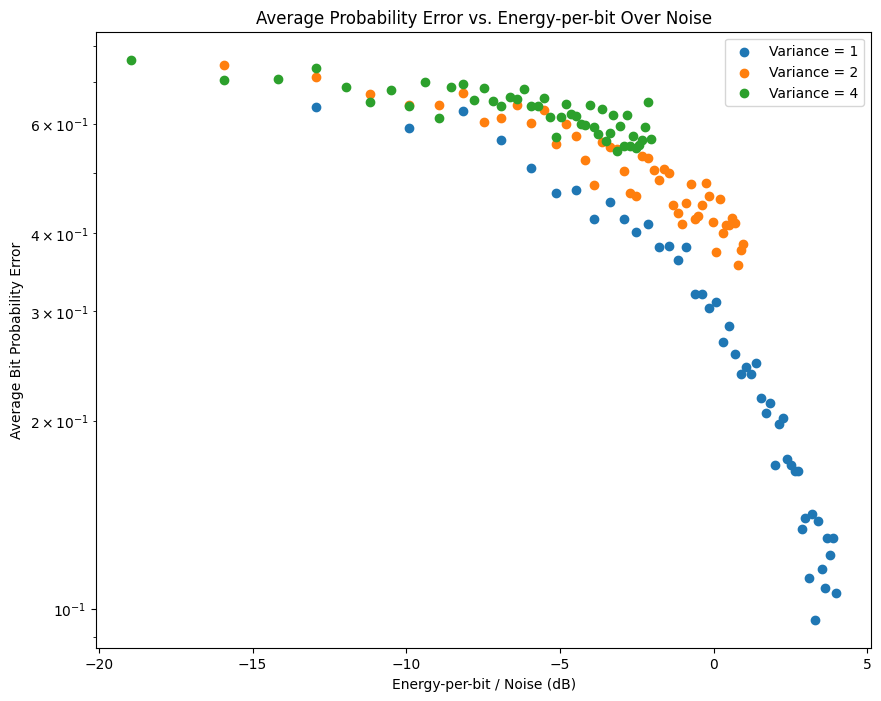

In [ ]:
master_function(2,2)

## **TASK 3**

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-21-3e0916d095d5>:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  m_int = np.array([mode(m_transmitted[0, i:int(i+d/n)]).mode[0] for i in range(0, d, int(d/n))])
<ipython-input-21-3e0916d095d5>:34: RuntimeWarning: divide by zero encountered in log10
  return 10 * np.log10(P/d/variance)
100%|██████████| 100/100 [00:52<00:00,  1.92it/s]


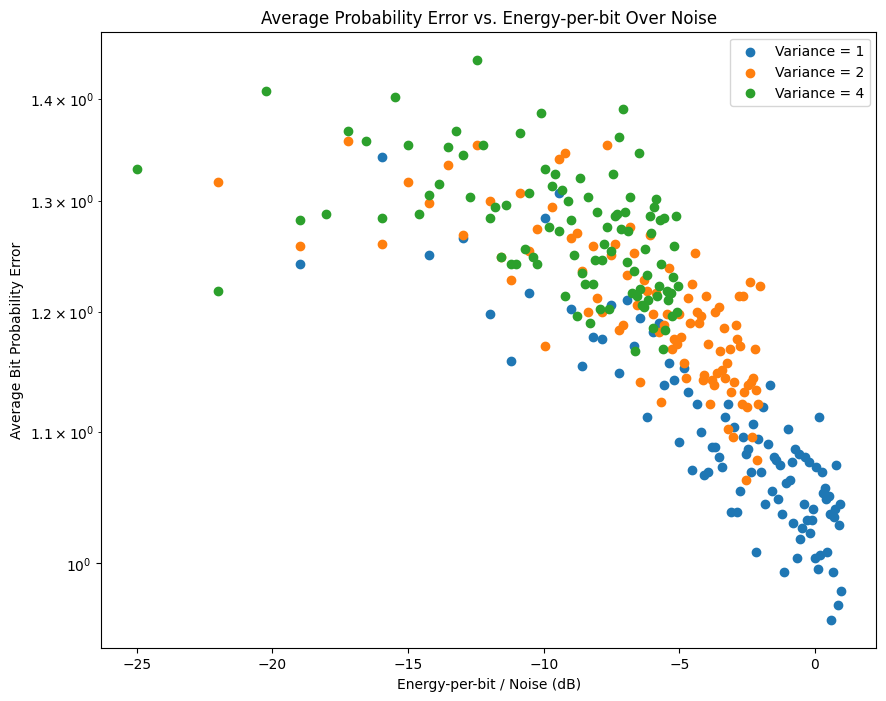

In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import norm, mode

def mode_map(n, d):
  def MC_BER_simulation(n, d, p_, sims = 500, variance = 1, mean = 0):
    def BPS(n, d, p_, dimension = 1):
      def IS():
        m_transmitted = np.random.choice([0,1], (dimension, d))
        # Simplifies channel by finding the mode of a given substring and creating new symbol sequence
        def channel():
          m_int = np.array([mode(m_transmitted[0, i:int(i+d/n)]).mode[0] for i in range(0, d, int(d/n))])
          return np.where(m_int == 1, np.sqrt(p_/n), -np.sqrt(p_/n))
        return m_transmitted, channel().reshape(dimension, n)

      m_transmitted, x = IS()
      H = np.ones((dimension, dimension))
      gaussian_pdf = np.random.normal(mean, variance, (dimension, n))

      y = H @ x + gaussian_pdf
      m_received = np.where(y >= 0, 1, 0)
      m_received = np.repeat(m_received, int(d/n), axis=1)
      return np.abs(np.sum(m_received - m_transmitted))

    errors = 0
    for i in range(sims):
      errors += BPS(n, d, p_)

    BER = errors / sims
    return BER

  def ENR_generator(d, P, variance = 1):
    return 10 * np.log10(P/d/variance)

  P = np.linspace(0,5,100)

  BER1 = []
  ENR1 = []
  BER2 = []
  ENR2 = []
  BER3 = []
  ENR3 = []

  for p in tqdm(P):
    BER1.append(np.array(MC_BER_simulation(n, d, p)))
    ENR1.append(np.array(ENR_generator(d, p)))
    BER2.append(np.array(MC_BER_simulation(n, d, p, variance = 2)))
    ENR2.append(np.array(ENR_generator(d, p, variance = 2)))
    BER3.append(np.array(MC_BER_simulation(n, d, p, variance = 4)))
    ENR3.append(np.array(ENR_generator(d, p, variance = 4)))

  plt.figure(figsize=(10, 8))
  plt.scatter(ENR1,BER1, label = "Variance = 1")
  plt.scatter(ENR2,BER2, label = "Variance = 2")
  plt.scatter(ENR3,BER3, label = "Variance = 4")
  plt.legend()
  plt.xlabel('Energy-per-bit / Noise (dB)')
  plt.yscale("log")
  plt.ylabel('Average Bit Probability Error')
  plt.title('Average Probability Error vs. Energy-per-bit Over Noise')
  plt.show()

mode_map(2, 4)

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-21-3e0916d095d5>:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  m_int = np.array([mode(m_transmitted[0, i:int(i+d/n)]).mode[0] for i in range(0, d, int(d/n))])
<ipython-input-21-3e0916d095d5>:34: RuntimeWarning: divide by zero encountered in log10
  return 10 * np.log10(P/d/variance)
100%|██████████| 100/100 [00:54<00:00,  1.84it/s]


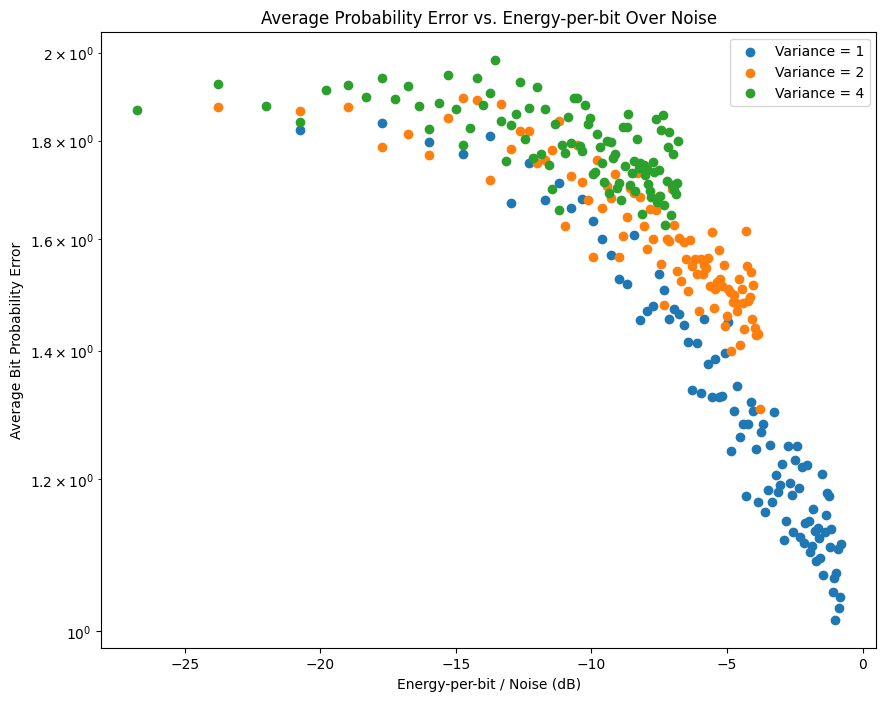

In [ ]:
mode_map(2, 6)

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-21-3e0916d095d5>:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  m_int = np.array([mode(m_transmitted[0, i:int(i+d/n)]).mode[0] for i in range(0, d, int(d/n))])
<ipython-input-21-3e0916d095d5>:34: RuntimeWarning: divide by zero encountered in log10
  return 10 * np.log10(P/d/variance)
100%|██████████| 100/100 [00:53<00:00,  1.86it/s]


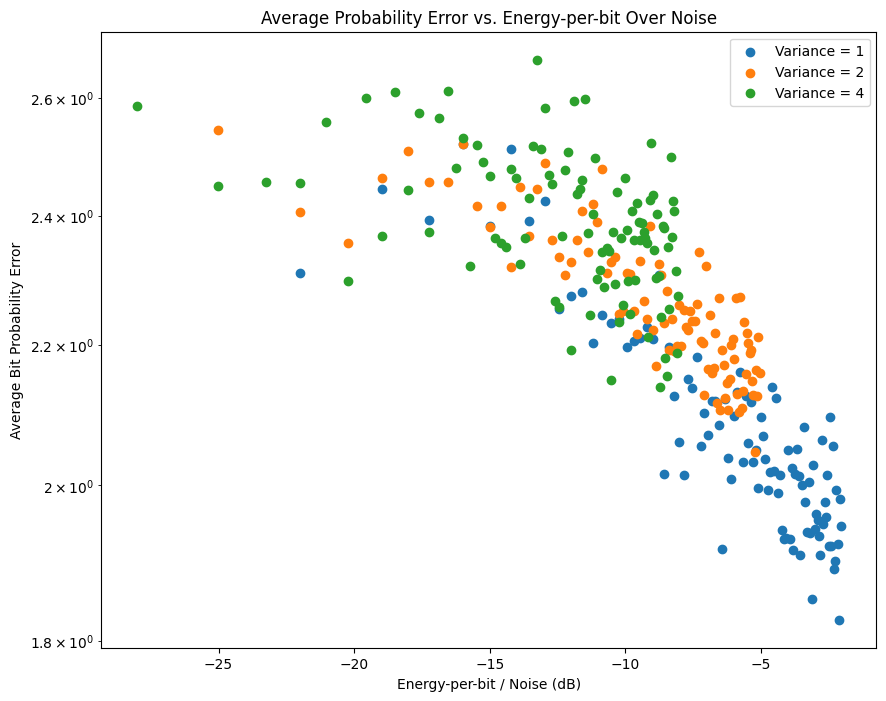

In [ ]:
mode_map(2, 8)

## **TASK 4**

In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import norm, mode

def H2_mode_map(n, d):
  def MC_BER_simulation(n, d, p_, sims = 500, variance = 1, mean = 0):
    def BPS(n, d, p_, dimension = 1):
      def IS():
        m_transmitted = np.random.choice([0,1], (dimension, d))
        def channel():
          m_int = np.array([mode(m_transmitted[0, i:int(i+d/n)]).mode[0] for i in range(0, d, int(d/n))])
          return np.where(m_int == 1, np.sqrt(p_/n), -np.sqrt(p_/n))
        return m_transmitted, channel().reshape(dimension, n)

      N = np.random.normal(mean, variance, (dimension, n))

      m_transmitted, x = IS()
      # Build out  n = 2 to represent fading
      H = np.zeros((dimension, dimension))
      for i in range(dimension):
        for j in range(dimension):
          H[i][j] = np.random.normal(1, 0)

      y = H @ x + N
      m_received = np.where(y >= 0, 1, 0)
      m_received = np.repeat(m_received, int(d/n), axis=1)
      return np.abs(np.sum(m_received - m_transmitted))

    errors = 0
    for i in range(sims):
      errors += BPS(n, d, p_)

    BER = errors / sims
    return BER

  def ENR_generator(d, P, variance = 1):
    return 10 * np.log10(P/d/variance)

  P = np.linspace(0,5,100)

  BER1 = []
  ENR1 = []
  BER2 = []
  ENR2 = []
  BER3 = []
  ENR3 = []

  for p in tqdm(P):
    BER1.append(np.array(MC_BER_simulation(n, d, p)))
    ENR1.append(np.array(ENR_generator(d, p)))
    BER2.append(np.array(MC_BER_simulation(n, d, p, variance = 2)))
    ENR2.append(np.array(ENR_generator(d, p, variance = 2)))
    BER3.append(np.array(MC_BER_simulation(n, d, p, variance = 4)))
    ENR3.append(np.array(ENR_generator(d, p, variance = 4)))

  plt.figure(figsize=(10, 8))
  plt.scatter(ENR1,BER1, label = "Variance = 1")
  plt.scatter(ENR2,BER2, label = "Variance = 2")
  plt.scatter(ENR3,BER3, label = "Variance = 4")
  plt.legend()
  plt.xlabel('Energy-per-bit / Noise (dB)')
  plt.yscale("log")
  plt.ylabel('Average Bit Probability Error')
  plt.title('Average Probability Error vs. Energy-per-bit Over Noise')
  plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-24-c368b32492b6>:12: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  m_int = np.array([mode(m_transmitted[0, i:int(i+d/n)]).mode[0] for i in range(0, d, int(d/n))])
<ipython-input-24-c368b32492b6>:38: RuntimeWarning: divide by zero encountered in log10
  return 10 * np.log10(P/d/variance)
100%|██████████| 100/100 [00:52<00:00,  1.91it/s]


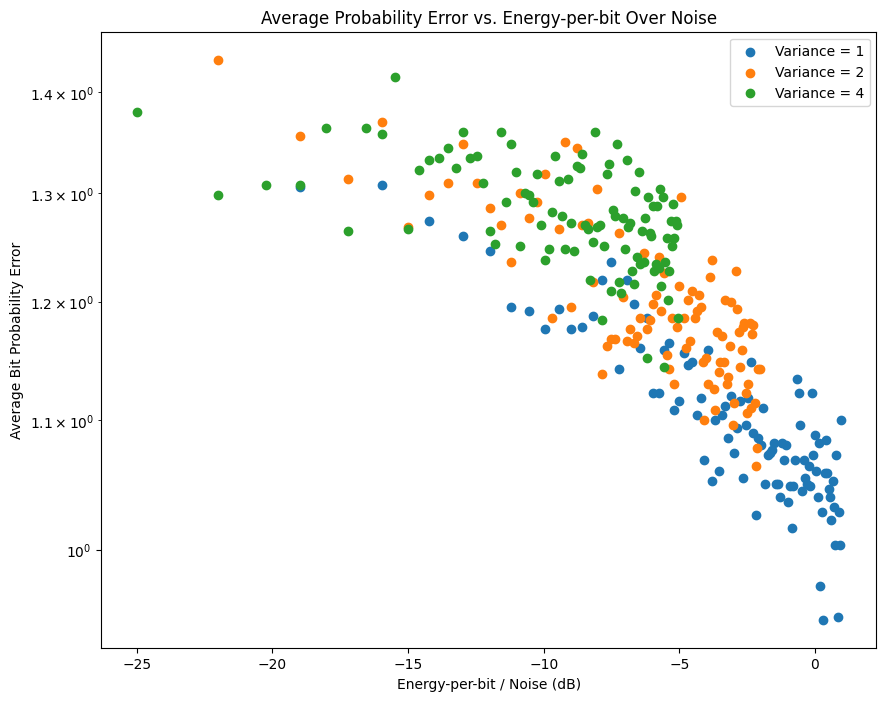

In [ ]:
H2_mode_map(2, 4)

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-24-c368b32492b6>:12: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  m_int = np.array([mode(m_transmitted[0, i:int(i+d/n)]).mode[0] for i in range(0, d, int(d/n))])
<ipython-input-24-c368b32492b6>:38: RuntimeWarning: divide by zero encountered in log10
  return 10 * np.log10(P/d/variance)
100%|██████████| 100/100 [00:50<00:00,  1.96it/s]


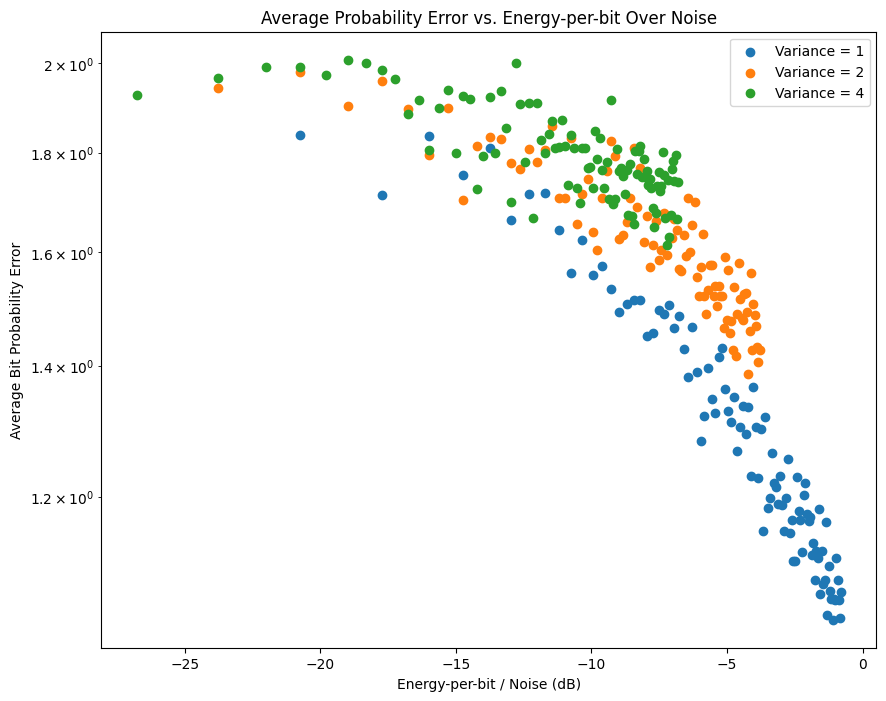

In [ ]:
H2_mode_map(2, 6)

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-24-c368b32492b6>:12: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  m_int = np.array([mode(m_transmitted[0, i:int(i+d/n)]).mode[0] for i in range(0, d, int(d/n))])
<ipython-input-24-c368b32492b6>:38: RuntimeWarning: divide by zero encountered in log10
  return 10 * np.log10(P/d/variance)
100%|██████████| 100/100 [00:51<00:00,  1.95it/s]


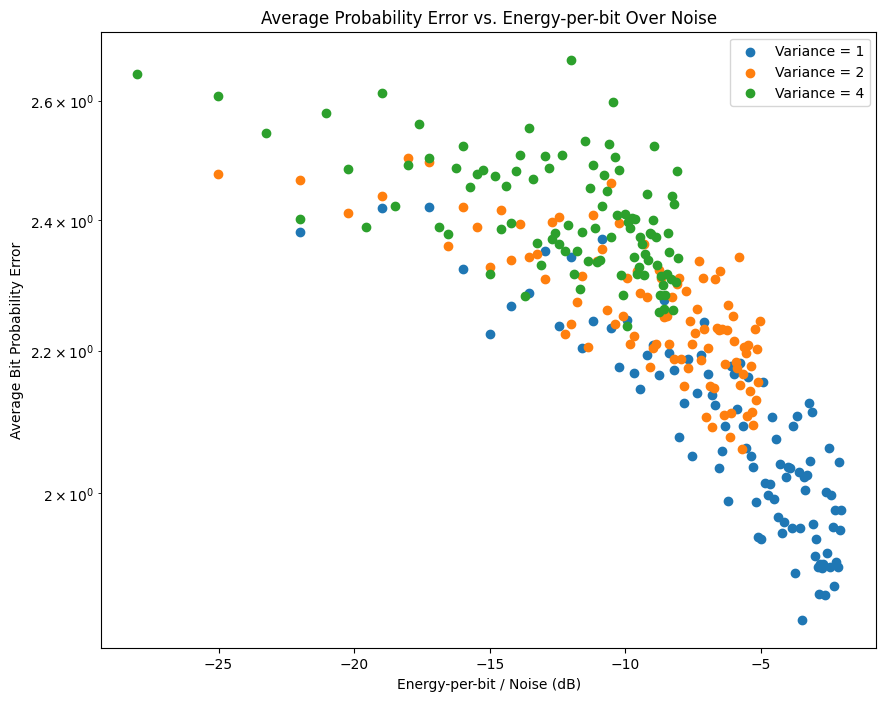

In [ ]:
H2_mode_map(2, 8)

In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import norm, mode

def known_H2_mode_map(n, d):
  def MC_BER_simulation(n, d, p_, sims = 500, variance = 1, mean = 0):
    def BPS(n, d, p_, dimension = 1):
      def IS():
        m_transmitted = np.random.choice([0,1], (dimension, d))
        def channel():
          m_int = np.array([mode(m_transmitted[0, i:int(i+d/n)]).mode[0] for i in range(0, d, int(d/n))])
          return np.where(m_int == 1, np.sqrt(p_/n), -np.sqrt(p_/n))
        return m_transmitted, channel().reshape(dimension, n)

      N = np.random.normal(mean, variance, (dimension, n))

      m_transmitted, x = IS()
      H = np.zeros((dimension, dimension))
      for i in range(dimension):
        for j in range(dimension):
          H[i][j] = np.random.normal(1, 0)

      # Render fading a known quantity

      y = np.linalg.inv(H) @ (H @ x + N)
      m_received = np.where(y >= 0, 1, 0)
      m_received = np.repeat(m_received, int(d/n), axis=1)
      return np.abs(np.sum(m_received - m_transmitted))

    errors = 0
    for i in range(sims):
      errors += BPS(n, d, p_)

    BER = errors / sims
    return BER

  def ENR_generator(d, P, variance = 1):
    return 10 * np.log10(P/d/variance)

  P = np.linspace(0,5,100)

  BER1 = []
  ENR1 = []
  BER2 = []
  ENR2 = []
  BER3 = []
  ENR3 = []

  for p in tqdm(P):
    BER1.append(np.array(MC_BER_simulation(n, d, p)))
    ENR1.append(np.array(ENR_generator(d, p)))
    BER2.append(np.array(MC_BER_simulation(n, d, p, variance = 2)))
    ENR2.append(np.array(ENR_generator(d, p, variance = 2)))
    BER3.append(np.array(MC_BER_simulation(n, d, p, variance = 4)))
    ENR3.append(np.array(ENR_generator(d, p, variance = 4)))

  plt.figure(figsize=(10, 8))
  plt.scatter(ENR1,BER1, label = "Variance = 1")
  plt.scatter(ENR2,BER2, label = "Variance = 2")
  plt.scatter(ENR3,BER3, label = "Variance = 4")
  plt.legend()
  plt.xlabel('Energy-per-bit / Noise (dB)')
  plt.yscale("log")
  plt.ylabel('Average Bit Probability Error')
  plt.title('Average Probability Error vs. Energy-per-bit Over Noise')
  plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-28-053ae0ac2c6a>:12: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  m_int = np.array([mode(m_transmitted[0, i:int(i+d/n)]).mode[0] for i in range(0, d, int(d/n))])
<ipython-input-28-053ae0ac2c6a>:39: RuntimeWarning: divide by zero encountered in log10
  return 10 * np.log10(P/d/variance)
100%|██████████| 100/100 [00:55<00:00,  1.81it/s]


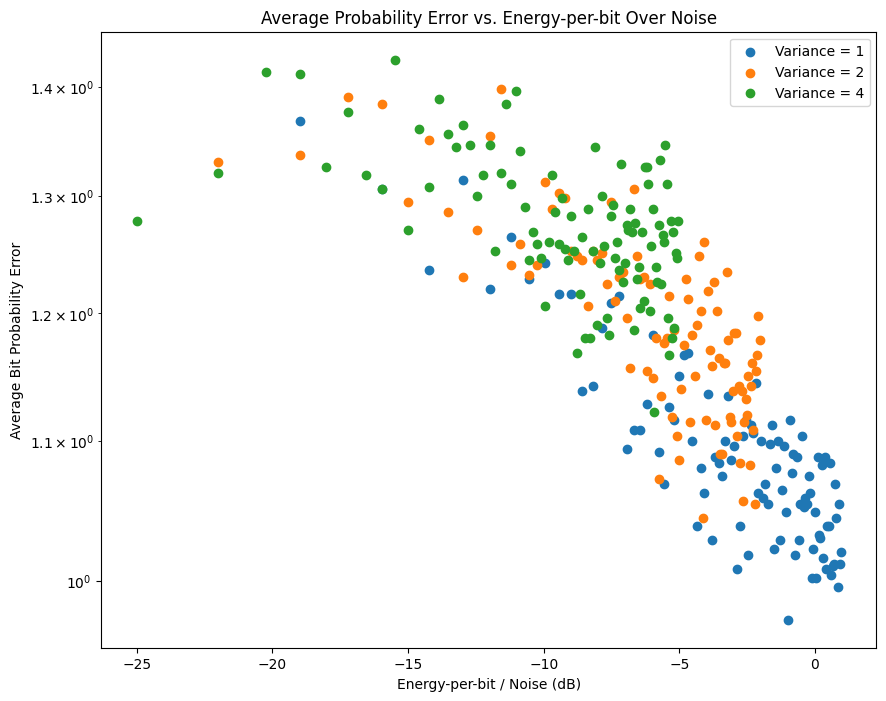

In [ ]:
known_H2_mode_map(2,4)

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-28-053ae0ac2c6a>:12: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  m_int = np.array([mode(m_transmitted[0, i:int(i+d/n)]).mode[0] for i in range(0, d, int(d/n))])
<ipython-input-28-053ae0ac2c6a>:39: RuntimeWarning: divide by zero encountered in log10
  return 10 * np.log10(P/d/variance)
100%|██████████| 100/100 [00:55<00:00,  1.81it/s]


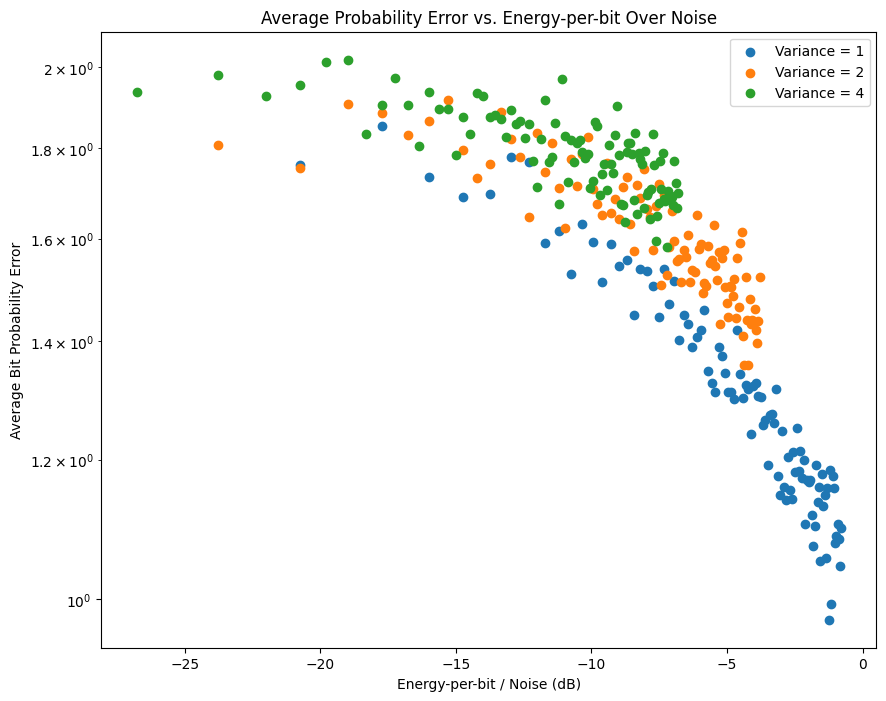

In [ ]:
known_H2_mode_map(2,6)

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-28-053ae0ac2c6a>:12: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  m_int = np.array([mode(m_transmitted[0, i:int(i+d/n)]).mode[0] for i in range(0, d, int(d/n))])
<ipython-input-28-053ae0ac2c6a>:39: RuntimeWarning: divide by zero encountered in log10
  return 10 * np.log10(P/d/variance)
100%|██████████| 100/100 [00:55<00:00,  1.81it/s]


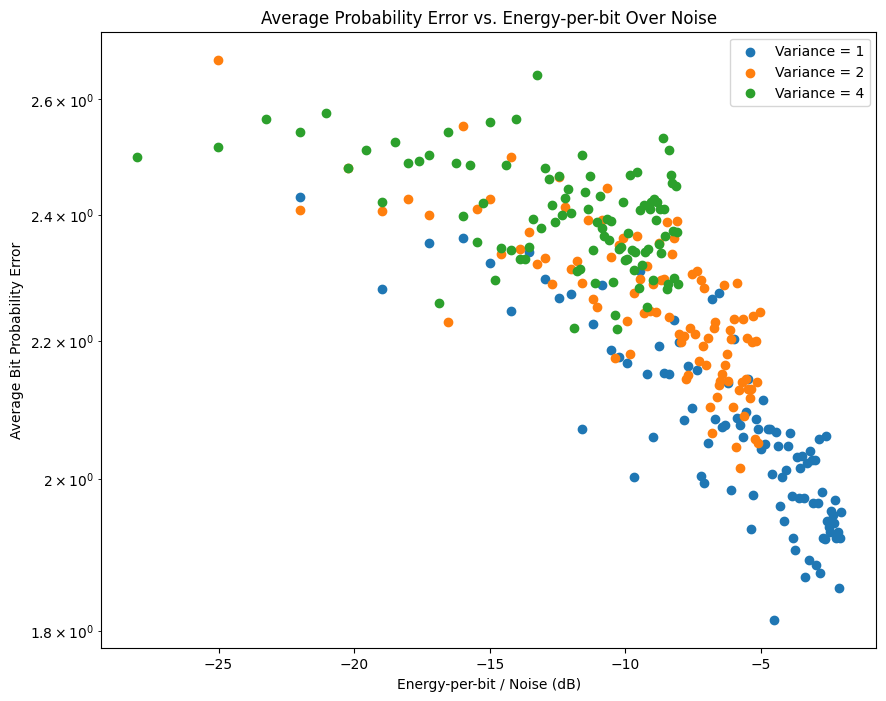

In [ ]:
known_H2_mode_map(2,8)